## Import module

In [1]:
import os
import sys
import math
from collections import defaultdict
import numpy as np
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
import networkx as nx
from geopandas import GeoDataFrame
import geopandas as gpd
from shapely.geometry import Point
os.chdir('../results/')

## Plot function

In [2]:
def StandardPlot(ax, fontsize=12, grid=True, ticks=True, left=True, right=True, top=True, bottom=True):
    font_label = {'family': 'arial', 'size': 12}
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('arial') for label in labels]
    if grid == True:
        ax.xaxis.grid(linestyle='--', c='grey',
                      alpha=0.4, linewidth=0.2, zorder=0)
        ax.yaxis.grid(linestyle='--', c='grey',
                      alpha=0.4, linewidth=0.2, zorder=0)
    if ticks == True:
        ax.tick_params(axis='x', direction='in',
                       color='white', labelsize=fontsize, pad=3)
        ax.tick_params(axis='y', direction='in',
                       color='white', labelsize=fontsize, pad=3)
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(right)
    ax.spines['top'].set_visible(top)
    ax.spines['bottom'].set_visible(bottom)
    return ax

def china_map(fig,ax,facecolor,edgecolor,linestyle,linewidth,alpha):
    for loc in [china,nine_lines]:
        ax = loc.geometry.to_crs(albers_proj).plot(  ax=ax,
                                                     facecolor=facecolor,
                                                     edgecolor=edgecolor,
                                                     linestyle=linestyle,
                                                     linewidth=linewidth,
                                                     alpha=alpha)
    ax.axis('off') 
    ax.set_xlim(bound.geometry[0].x, bound.geometry[1].x)
    ax.set_ylim(bound.geometry[0].y, bound.geometry[1].y)
    ax_child = nine_dot(fig,china,facecolor,edgecolor,linestyle,linewidth,alpha)
    return china,ax_child

def nine_dot(fig,china,facecolor,edgecolor,linestyle,linewidth,alpha):
    ax_child = fig.add_axes([0.75, 0.15, 0.2, 0.2])
    for loc in [china,nine_lines]:
        ax_child = loc.geometry.to_crs(albers_proj).plot(  ax=ax_child,
                                                             facecolor=facecolor,
                                                             edgecolor='lightgrey',
                                                             linestyle=linestyle,
                                                             linewidth=0.8,
                                                             alpha=alpha)
    ax_child.set_xlim(bound.geometry[2].x, bound.geometry[3].x)
    ax_child.set_ylim(bound.geometry[2].y, bound.geometry[3].y)
    ax_child.set_xticks([])
    ax_child.set_yticks([])
    return ax_child

def geo_prov_mat():
    loc = {'Shandong': [117.000923, 36.675807],
           'Hebei': [115.48333, 38.03333],
           'Jilin': [125.35000, 43.88333],
           'Heilongjiang': [127.63333, 47.75000],
           'Liaoning': [123.38333, 41.80000],
           'Neimenggu': [111.670801, 41.818311],
           'Xinjiang': [87.68333, 43.76667],
           'Gansu': [103.73333, 36.03333],
           'Ningxia': [106.26667, 37.46667],
           'Shanxi': [112.53333, 37.86667],
           'Shaanxi': [108.95000, 34.26667],
           'Henan': [113.65000, 34.76667],
           'Anhui': [117.283042, 31.86119],
           'Jiangsu': [119.78333, 32.05000],
           'Zhejiang': [120.20000, 30.26667],
           'Fujian': [118.30000, 26.08333],
           'Guangdong': [113.23333, 23.16667],
           'Jiangxi': [115.90000, 28.68333],
           'Hainan': [110.35000, 20.01667],
           'Guangxi': [108.320004, 22.82402],
           'Guizhou': [106.71667, 26.56667],
           'Hunan': [113.00000, 28.21667],
           'Hubei': [114.298572, 30.584355],
           'Sichuan': [104.06667, 30.66667],
           'Yunnan': [102.73333, 25.05000],
           'Xizang': [91.00000, 30.60000],
           'Qinghai': [96.75000, 36.56667],
           'Tianjin': [117.20000, 39.13333],
           'Shanghai': [121.55333, 31.20000],
           'Chongqing': [106.45000, 29.56667],
           'Beijing': [116.41667, 39.91667],
           'Taiwan': [121.30, 25.03],
           'HongKong': [114.10000, 22.20000],
           'Macau': [113.50000, 22.20000],
           }  # 拿到的坐标原始数据就长这样，换成读表格也差不多
    prov_lst = ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou',
                'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hubei', 'Hunan', 'Jiangsu',
                'Jiangxi', 'Jilin', 'Liaoning', 'Neimenggu', 'Ningxia', 'Qinghai',
                'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Xinjiang', 'Xizang', 'Yunnan', 'Zhejiang','Taiwan']
    mat_dct = defaultdict(dict)
    for i in prov_lst:
        for j in prov_lst:
            if i == j:
                geodis = 0
            else:
                ja = loc[i][0] / 180 * math.pi
                jb = loc[j][0] / 180 * math.pi
                wa = loc[i][1] / 180 * math.pi
                wb = loc[j][1] / 180 * math.pi
                geodis = 6371 * math.acos(math.cos(wa) * math.cos(wb)
                                          * math.cos(jb - ja) + math.sin(wa) * math.sin(wb))
            mat_dct[i][j] = geodis
    geomat = pd.DataFrame(mat_dct)
    return geomat

## Transmission network among provinces （BA.5)

/home/yanxu/miniconda3/envs/zc/lib/python3.9/site-packages/geopandas/geodataframe.py:221: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  object.__setattr__(self, attr, val)
/tmp/ipykernel_2345816/2013521816.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


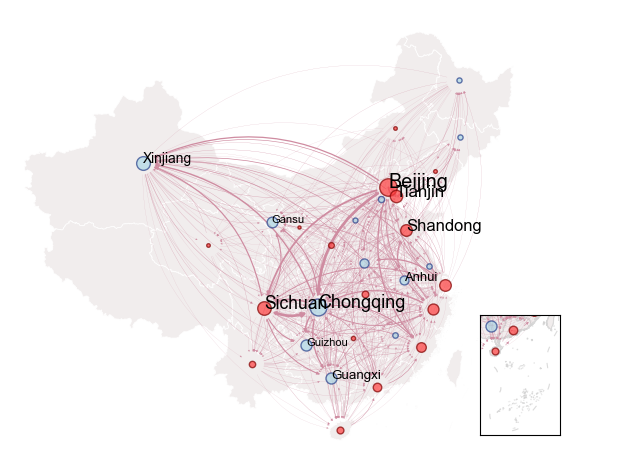

In [3]:
# Load shpfile
china = gpd.read_file('../data/shpfile/china.shp',encoding='utf-8')
china = china.dissolve(by='OWNER').reset_index(drop=False)
# Load the data of the nine-dash line in the South China Sea.
nine_lines = gpd.read_file('../data/shpfile/china_nine_dotted_line.shp',encoding='utf-8')
# Define CRS
albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'
bound = gpd.GeoDataFrame({
    'x': [80, 150, 106.5, 123],
    'y': [15, 50, 2.8, 24.5]
})
# map processing
bound.geometry = bound.apply(lambda row: Point([row['x'], row['y']]), axis=1)
bound.crs = 'EPSG:4326'
bound.to_crs(albers_proj, inplace=True)
tar_lineage = 'BA.5'
prov_lst = ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou',
            'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hubei', 'Hunan', 'Jiangsu',
            'Jiangxi', 'Jilin', 'Liaoning', 'Neimenggu', 'Ningxia', 'Qinghai',
            'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Xinjiang', 'Xizang', 'Yunnan', 'Zhejiang']
df = pd.read_csv('Domestic_trans/%s.csv' % tar_lineage,index_col = 0)
df = df.sort_values(by='export', ascending=False)
top_5 = list(df.index)[:5]
df['rank'] = [j if (j <= 0) and (l not in top_5)  else i for i,j,l in zip(df['export'],df['sink_source'],df.index)]
df = df.sort_values(by='rank', ascending=False)
top_5 = list(df.index)[:5]
bottom_5 = list(df.index)[-5:]
prov_export = {i:j for i,j in zip(df.index,df['export'])}
prov_sin_sou =    {i:j for i,j in zip(df.index,df['sink_source'])}
prov_sin_sou_abs =    {i:abs(j) for i,j in zip(df.index,df['sink_source'])}
prov_export =    {i:abs(j) for i,j in zip(df.index,df['export'])}
prov_import =    {i:abs(j) for i,j in zip(df.index,df['import'])}
for i in prov_lst:
    if i not in prov_export:
        prov_export[i] = 0
trans_net =  df.drop(['sum','local','import','export','sink_source'], axis=1)
trans_net = trans_net[prov_lst].reindex(prov_lst)
matrix_v = trans_net.values.astype(float)
np.fill_diagonal(matrix_v,0 )
trans_net = pd.DataFrame(matrix_v, columns=trans_net.columns, index=trans_net.index)
G=nx.from_pandas_adjacency(trans_net, create_using=nx.DiGraph())        
plt.rcParams['pdf.fonttype'] = 42
fontsize = 12
font_label = {'family': 'Arial', 'size': fontsize}
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes((0, 0, 1, 1))
facecolor = '#EEE9E9'
edgecolor = 'white'
linestyle = '-'
linewidth = 0.6
alpha = 0.8
china,ax_child = china_map(fig,ax,facecolor,edgecolor,linestyle,linewidth,alpha)
exclude_loc = ['Huangwei','Aomen','Hongkong']
prov_shft = {'Ningxiahuizu':'Ningxia','Neimongol':'Neimenggu','SHanxi':'Shaanxi','Guangxizhuangzu':'Guangxi','Xinjianguygur':'Xinjiang'}
pos_dct = {}
for idx, _ in enumerate(china.geometry.representative_point().to_crs(albers_proj)):
    region = china.loc[idx, 'FENAME'].split()[0]
    if region in prov_shft:
        region = prov_shft[region]
    if region not in exclude_loc:
        pos_dct[region] = (_.x,_.y)
edge_color = 'k'
point_color_z = '#FF4040'
point_ecolor_z = 'maroon'
point_color_f = 'lightblue'
point_ecolor_f = '#27408B'
point_alpha = 0.7
for axi in [ax,ax_child]:
    nx.draw_networkx_edges(
                           G, pos_dct,style='solid',connectionstyle='arc3,rad=0.3',
                           width=[G[i][j]['weight']/50+0.05 for i,j in G.edges()],
                           arrowsize = [G[i][j]['weight']/30+3 for i,j in G.edges()], 
                           edge_color = '#CF8CA1',
                           ax = axi)
for region,(x_,y_) in pos_dct.items():
    if prov_sin_sou[region] >=0 :
        ax.scatter(x_, y_, s = prov_export[region]/3,color = point_color_z,edgecolor = point_ecolor_z,alpha =point_alpha)
        ax_child.scatter(x_, y_, s = prov_export[region]/3,color = point_color_z,edgecolor = point_ecolor_z,alpha = point_alpha)
    else:
        ax.scatter(x_, y_, s = prov_import[region]/3,color = point_color_f,edgecolor = point_ecolor_f,alpha = point_alpha)
        ax_child.scatter(x_, y_, s = prov_import[region]/3,color = point_color_f,edgecolor = point_ecolor_f,alpha = point_alpha)        
    if region in top_5 or region in bottom_5:
        if prov_sin_sou[region] >=0:
            ax.text(x_, y_, region,size = math.sqrt(prov_export[region])/3+7,fontdict={'family': 'arial'},color = 'black')
        else:
            ax.text(x_, y_, region,size = math.sqrt(prov_export[region])/3+7,fontdict={'family': 'arial'},color = 'black')
plt.tight_layout()

## Source-Sink plot (BA.5)

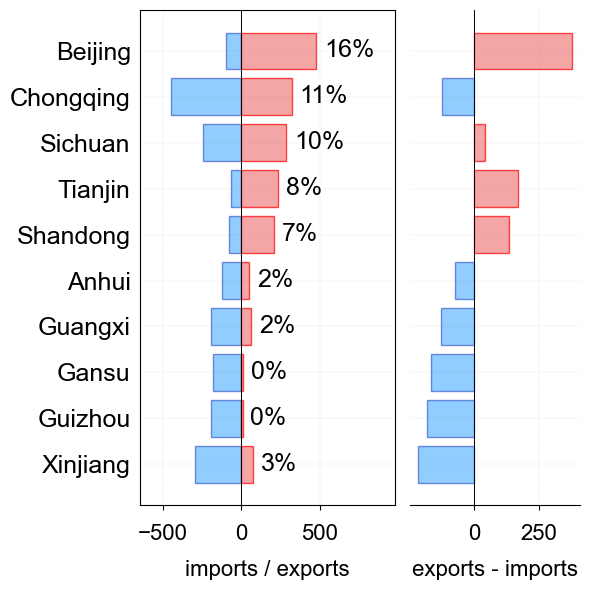

In [4]:
def expimp_plot(ax,df,prov_ex_prop,fontsize):
    top_5 = list(df.index)[:5]
    bottom_5 = list(df.index)[-5:]
    tar_prov_lst = top_5+bottom_5
    tar_prov_lst = tar_prov_lst[::-1]
    prov_import =    {i:-j for i,j in zip(df.index,df['import'])}
    prov_export =    {i:j for i,j in zip(df.index,df['export'])}
    df_plot_import = pd.DataFrame({'prov':tar_prov_lst,'value':[prov_import[i] for i in tar_prov_lst]})
    df_plot_export = pd.DataFrame({'prov':tar_prov_lst,'value':[prov_export[i] for i in tar_prov_lst]})
    df_plot_import['color'] = '#63B8FF'
    df_plot_import['ecolor'] = '#3A5FCD'
    df_plot_export['ecolor'] = 'red'
    df_plot_export['color'] = 'lightcoral'
    ax.barh(df_plot_import['prov'],df_plot_import['value'],edgecolor = df_plot_import['ecolor'],alpha = 0.7,color = df_plot_import['color'])
    ax.barh(df_plot_export['prov'],df_plot_export['value'],edgecolor = df_plot_export['ecolor'],alpha = 0.7,color = df_plot_export['color'])
    ax.axvline(0,0,1, linestyle='solid',color='k', alpha=1,lw=0.7)
    ax = StandardPlot(ax,left=True,right = True,top = True,grid = True)
    ax.tick_params(axis='x', direction='out',color='black', labelsize=fontsize-2, pad=10)
    ax.tick_params(axis='y', direction='out',color='white', labelsize=fontsize)
    ax.set_xlabel(r'imports / exports', fontproperties='arial',size=fontsize-2,labelpad = 11.5)
    ax.set_xlim([min(df_plot_import['value'])-200,max(df_plot_export['value'])+500])
    for x,y in zip(df_plot_export['prov'],df_plot_export['value']):
        ax.text(y+50,x, '%s%%' %round(prov_ex_prop[x]*100),fontdict={'family': 'arial'},size = fontsize,va = 'center')
    return ax

def source_sink_plot(ax,df):
    top_5 = list(df.index)[:5]
    bottom_5 = list(df.index)[-5:]
    tar_prov_lst = top_5+bottom_5
    tar_prov_lst = tar_prov_lst[::-1]
    prov_sin_sou =    {i:j for i,j in zip(df.index,df['sink_source'])}
    df_plot = pd.DataFrame({'prov':tar_prov_lst,'value':[prov_sin_sou[i] for i in tar_prov_lst]})
    df_plot['ecolor'] = ['red' if i>=0 else '#3A5FCD' for i in df_plot['value']]
    df_plot['color'] = ['lightcoral' if i>=0 else '#63B8FF' for i in df_plot['value']]
    ax.barh(df_plot['prov'],df_plot['value'],edgecolor = df_plot['ecolor'],alpha = 0.7,color = df_plot['color'])
    ax.axvline(0,0,1, linestyle='solid',color='k', alpha=1,lw=0.7)
    ax = StandardPlot(ax,left=False,right = False,top = False,grid = True)
    ax.tick_params(axis='x', direction='out',color='black', labelsize=fontsize-2, pad=10)
    ax.tick_params(axis='y', direction='out',color='white', labelsize=fontsize-2)
    ax.set_xlabel(r'exports - imports', fontproperties='arial',size=fontsize-2,labelpad = 11.5)
    return ax

prov_lst = ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou',
            'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hubei', 'Hunan', 'Jiangsu',
            'Jiangxi', 'Jilin', 'Liaoning', 'Neimenggu', 'Ningxia', 'Qinghai',
            'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Xinjiang', 'Xizang', 'Yunnan', 'Zhejiang','Taiwan']
tar_lineage = 'BA.5'
df = pd.read_csv('Domestic_trans/%s.csv' % tar_lineage,index_col = 0)
df = df.sort_values(by='export', ascending=False)
df['prop'] = df['export']/df['export'].sum()
prov_ex_prop = {i:j for i,j in zip(df.index,df['prop'])} 
top_5 = list(df.index)[:5]
df['rank'] = [j if (j <= 0) and (l not in top_5)  else i for i,j,l in zip(df['export'],df['sink_source'],df.index)]
df = df.sort_values(by='rank', ascending=False)
fontsize = 18
fig, ax = plt.subplots(1,2,figsize=(6,6),sharey='all',gridspec_kw={'width_ratios': [3,2]})
ax_array = ax.flatten()
ax1 = ax_array[0]
ax3 = ax_array[1]
ax1 =  expimp_plot(ax1,df,prov_ex_prop,fontsize)
ax3 = source_sink_plot(ax3,df)
plt.tight_layout()

## Dispersal geodistance

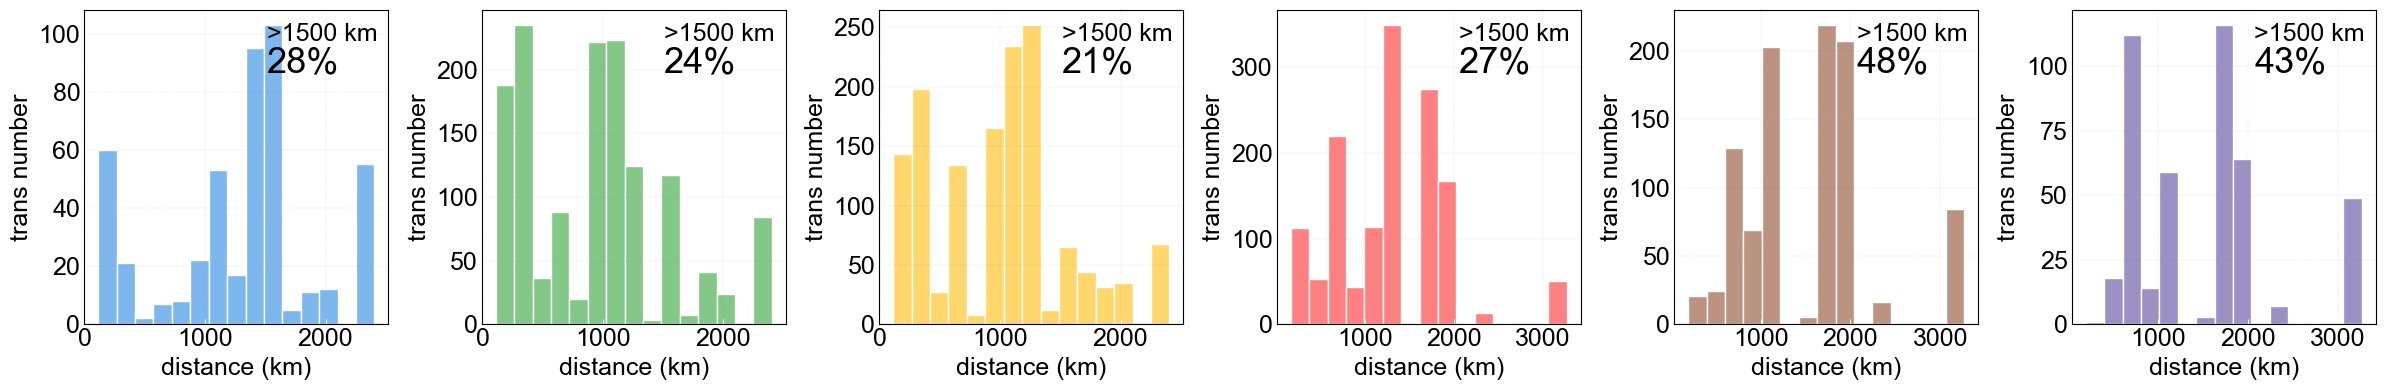

In [5]:
prov_lst = ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou',
            'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hubei', 'Hunan', 'Jiangsu',
            'Jiangxi', 'Jilin', 'Liaoning', 'Neimenggu', 'Ningxia', 'Qinghai',
            'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Xinjiang', 'Xizang', 'Yunnan', 'Zhejiang']
dominant_Omicron_sublineages = ['BA.5','BF.7','DY','XBB','EG.5', 'HK']
df = pd.read_csv('../data/cn_meta_unredund.csv')
df['year_month'] = ['%s-%s' %
                    (i.split('-')[0], i.split('-')[1]) for i in df['Collection date']]
Id_date_prov = {i: (a, b) for i, a, b in zip(
    df['Accession ID'], df['Collection date'], df['Province'])}
geo_mat = geo_prov_mat()
export_dct = defaultdict(list)
export_hub_dct = defaultdict(list)
for tar_lineage in dominant_Omicron_sublineages:
    df_net = pd.read_csv('mutnet/final_%s_network.csv' % tar_lineage)
    df_net = df_net[(~df_net['s_prov'].isin(['Taiwan','HongKong'])) & (~df_net['t_prov'].isin(['Taiwan','HongKong']))]
    df_net = df_net.query('s_country=="China"')
    df_net = df_net.assign(
        delta_t=lambda x: [(datetime.datetime.strptime(t2, "%Y-%m-%d").date() - datetime.datetime.strptime(
            t1, "%Y-%m-%d").date()).days for t1, t2 in zip(x["s_date"], x["t_date"])],
    )
    for c1,p1, p2, mut, delta_t in zip(df_net['s_country'],df_net['s_prov'], df_net['t_prov'], df_net['weight'], df_net['delta_t']):
        geodis = geo_mat[p1][p2]
        if delta_t>=0:
            if p1 != p2:
                export_dct[tar_lineage].append(geodis)
                if tar_lineage in dominant_Omicron_sublineages[:3]:
                    if p1 in ['Beijing']:
                        export_hub_dct[tar_lineage].append(geodis)
                else:
                    if p1 in ['Shanghai']:
                        export_hub_dct[tar_lineage].append(geodis)
fig, ax = plt.subplots(1,6,figsize=(24, 4))
ax_array = ax.flatten()
fontsize=18  
color_dct = {
            'BA.5':'#7EB6EE',
            'BF.7':'#84C887',
            'DY':'#FFD76D',
            'XBB':'#FF8080',
            'EG.5':'#BC9281',
            'HK':'#9D90C5'}
for axi,lineage in zip(ax_array,dominant_Omicron_sublineages):
    axi.hist(export_hub_dct[lineage] ,bins=15,rwidth=1,ec = 'white',fc = color_dct[lineage])
    axi = StandardPlot(axi,fontsize=fontsize)
    dis_2000_lst = [i for i in export_dct[lineage]if i>1500]
    prop_up_2000 = round(100*len(dis_2000_lst)/len(export_dct[lineage]))
    prop_down_2000 = 100-prop_up_2000
    axi.text(0.6,0.8, '%s%%'% prop_up_2000, size=fontsize+8, fontdict={'family': 'arial','fontweight':'bold'},
           transform=axi.transAxes)    
    axi.text(0.6,0.9, '>1500 km', size=fontsize, fontdict={'family': 'arial','fontweight':'bold'},
           transform=axi.transAxes)    
    axi.set_ylabel('trans number',{'family': 'arial', 'size': fontsize})
    axi.set_xlabel('distance (km)',{'family': 'arial', 'size': fontsize})
plt.tight_layout()